In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib.ticker as mtick
import math
import matplotlib.image as mpimg
import scipy.stats as sc

from single_echelon_utils.demand_models import * 
image_dir = '/Volumes/GoogleDrive/.shortcut-targets-by-id/10oYqI9u7nCLK0q7xF2CvGGIQVokusjaI/Exjobb/4. Report/Images'

TO-DO
Compounding distribution: Geometric vs Logarithmic
Normal vs gamma distribution

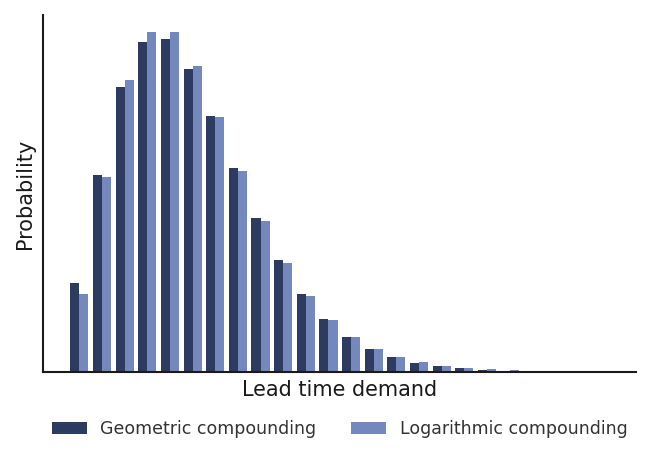

In [4]:
# Generate data series of geometric and logarithmic

mean = 5
variance = 10

p_demand_logarithmic = demand_prob_arr_negative_binomial(1,mean,variance)

beta = 1- ( 2/ (1+variance/mean) )

cumulative = 0 
p_comp_geometric = []
j = 1
while cumulative < 1-1e-6:
    p_j = (1-beta)*math.pow(beta,j-1)
    p_comp_geometric.append(p_j)
    cumulative += p_j
    j += 1

p_comp_geometric = np.array(p_comp_geometric)

p_demand_geometric = demand_probability_arr_Empiric_Compound_Poisson(1,mean,variance,p_comp_geometric)


x = range(len(p_demand_logarithmic))

plt.style.use('Results/our_style.mplstyle')
fig, ax = plt.subplots()

col1 = '#2D3B60'
col2 = '#7488BD'


#ax.plot(x,p_demand_geometric[:len(p_demand_logarithmic)], label = "Geometric compounding", color = col1, marker = '.', linestyle = '-')
#ax.plot(x,p_demand_logarithmic, label = "Logarithmic compounding", color = col2, marker = '.', linestyle = '--')
x = np.array(x)

w = 0.4
ax.bar(x-w,p_demand_geometric[:len(p_demand_logarithmic)], width = w, label = "Geometric compounding", color = col1)
ax.bar(x,p_demand_logarithmic, width = w, label = "Logarithmic compounding", color = col2)

ax.set_ylabel("Probability")
ax.set_xlabel("Lead time demand")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])


ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 2)


plt.savefig(f'{image_dir}/logarithmic_vs_geometric_compounding.png', bbox_inches = 'tight')
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Garamond


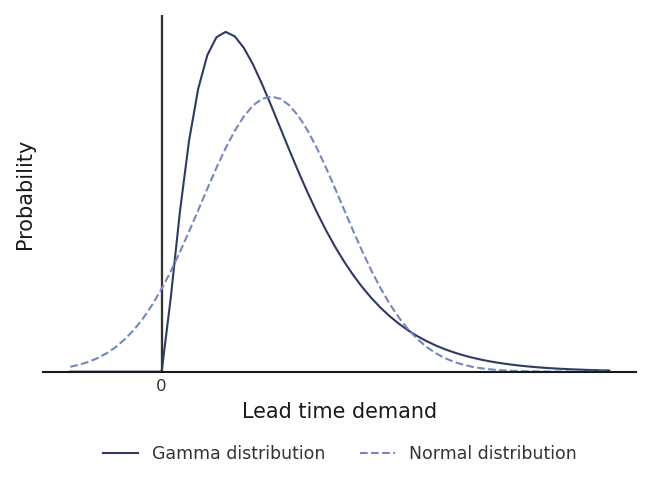

In [3]:

mean = 12
variance = 60


x = range(-10,50)
p_demand_normal = sc.norm.pdf(x,loc = mean, scale = math.sqrt(variance))

rate = mean/variance
alpha = mean*rate
p_demand_gamma = sc.gamma.pdf(x, a = alpha, scale = 1/rate)



plt.style.use('Results/our_style.mplstyle')
fig, ax = plt.subplots()

col1 = '#2D3B60'
col2 = '#7488BD'


ax.plot(x,p_demand_gamma, label = "Gamma distribution", color = col1, linestyle = '-')
ax.plot(x,p_demand_normal, label = "Normal distribution", color = col2, linestyle = '--')

#ax.bar(x,p_demand_geometric[:len(p_demand_logarithmic)], label = "Geometric compounding", color = col1)
#ax.bar(x,p_demand_logarithmic, label = "Logarithmic compounding", color = col2)

ax.set_ylabel("Probability")
ax.set_xlabel("Lead time demand")
ax.get_xaxis().set_ticks([0])
ax.get_yaxis().set_ticks([])
ax.set_ylim(0)

#ax.grid(color = "black", linestyle = "dotted", linewidth = 1.1, alpha = 0.6)
ax.grid(color = "black", linestyle = "-", linewidth = 1.1, alpha = 0.8)
ax.spines['left'].set_visible(False)


ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 2)


plt.show
plt.savefig(f'{image_dir}/gamma_vs_normal.png', bbox_inches = 'tight')

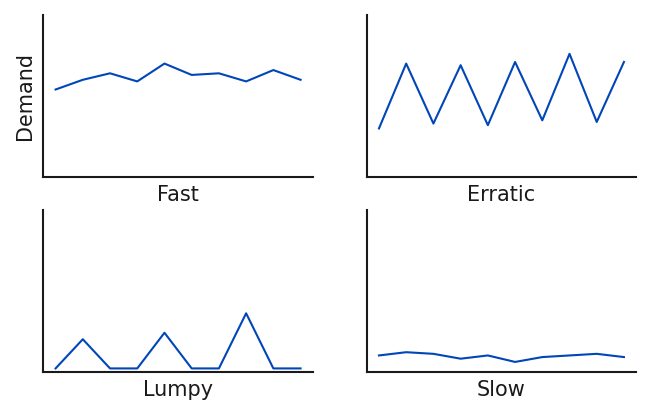

In [27]:
## Graphs about demand types



plt.style.use('Results/our_style.mplstyle')
fig, axs = plt.subplots(nrows = 2, ncols = 2)

col1 = '#2D3B60'
col2 = '#7488BD'

x = range(10)
fast =      [5.4,   6, 6.4, 5.9,   7, 6.3, 6.4, 5.9, 6.6, 6.0]
erratic =   [3  ,   7, 3.3, 6.9, 3.2, 7.1, 3.5, 7.6, 3.4, 7.1]
slow =      [1  , 1.2, 1.1, 0.8, 1.0, 0.6, 0.9,   1, 1.1, 0.9]
lumpy =     [0.2, 2,   0.2,   0.2, 2.4,   0.2,   0.2,   3.6,   0.2,   0.2]

for ax,y,name in zip(axs.flat,[fast,erratic,lumpy,slow], ["Fast", "Erratic", "Lumpy", "Slow"]):
    ax.set_ylim((0,10))
    ax.grid(False)
    #ax.get_yaxis().set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(name)
    if name == "Fast":
        ax.set_ylabel("Demand")

    ax.plot(x,y)

#ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 2)


plt.show
plt.savefig(f'{image_dir}/demand_type_examples.png', bbox_inches = 'tight')
